
# Stroop Task Analysis

### The Stroop task is a widely known experiment used to measure cognitive control by showing how the brain resolves conflict between competing sources of information.
#### This task is important to Cognitive Neuroscience since it provides a behavioural window into 
- inhibitory control (suppressing the urge to read the word), 
- selective attention (forcusing on the colour, ignoring the meaning) and 
- cognitive flexibility (switching between automatic and controlled responses, system 1 and 2, for those who have read Daniel Kahneman)

##### Research using fMRI has shown that the anterior cingulate cortex is primarily involved in conflicting information management, while the dorsolateral prefrontal cortex is associated with implementing cognitive control to resolve this conflict (Kerns et al., 2004). Likewise,EEG has been used to show that midfrontal theta oscillations of 4-8Hz occurred in the anterior cingulate cortex during incongruent trials, further supporting the role of this brain region during conflicting information management (Krebs et al., 2013)



#### Experimental Design: 
- Data set: this dataset was sourced from GitHub, https://github.com/Lakens/Stroop/blob/master/stroop.csv and made available by Daniel Lakens, a psychology researcher and open science advocate 
(The data used in this experiment was created for educational purposes and collected from Psychology stuents. The data was collected from the self reported time from participants after completing  a block of trials.)

- It is a within Subjects dataset, meaning participants completed both conditions (with each row representing the participants reaction time for each condition)
    - Congruent trial condition: the colour of the word matches the meaning
    - Incongruent trial condition: the colour of the word doesn't match the meaning


#### The Analysis in this notebook
- Within-subjects comparison: a paired T-Test will be conducted (due to the paired nature of the data)
- 

# Data Analysis

1. Import required libraries and load and explore dataset

In [5]:
# Import core libraries for data manipulation, visualization, and statistics
import pandas as pd  # For handling data tables
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For prettier statistical graphics
from scipy import stats  # For statistical tests like the t-test

# Apply a clean style to plots
sns.set(style="whitegrid")

In [17]:
# Load the dataset from a CSV file
df = pd.read_csv('../data/stroop.csv', delim_whitespace=True)

# Show the first few rows of the dataset to verify it's loaded correctly
df.head()

/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_3972/2672630782.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/stroop.csv', delim_whitespace=True)


,PPNR,Congruent,Incongruent,Year
0,1,21.871,21.974,2013
1,2,22.820,25.116,2013
2,3,14.810,18.500,2013
3,4,10.142,20.786,2013
4,5,14.414,22.097,2013


2. Assess descriptive statistics in order to get an understanding of average reaction time for the conditions, and look at the mean difference between the two conditions. 


In [19]:
print("Mean Congruent RT:", df['Congruent'].mean())
print("Mean Incongruent RT:", df['Incongruent'].mean())

Mean Congruent RT: 15.101938931297708
Mean Incongruent RT: 23.004725190839697


In [20]:
# Print the mean difference
print("Mean RT Difference (Incongruent - Congruent):", 
      (df['Incongruent'] - df['Congruent']).mean())

Mean RT Difference (Incongruent - Congruent): 7.902786259541985


3. Visualising Reaction Time Distributions

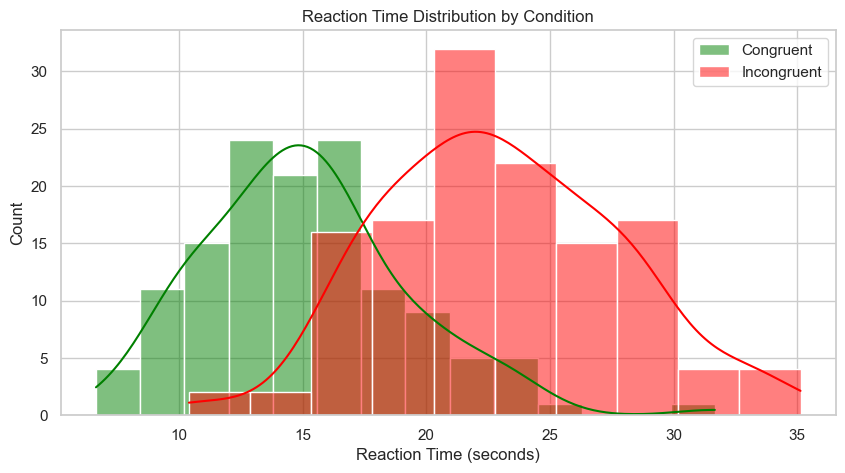

In [21]:
# Create overlapping histograms to visualize the RT distribution for each condition
plt.figure(figsize=(10, 5))
sns.histplot(df['Congruent'], kde=True, color='green', label='Congruent')
sns.histplot(df['Incongruent'], kde=True, color='red', label='Incongruent')
plt.title('Reaction Time Distribution by Condition')
plt.xlabel('Reaction Time (seconds)')
plt.legend()
plt.savefig('../figures/rt_distributions.png')  # Save figure for report
plt.show()

 Outcome: Reaction times are on average higher in the incongruent condition, and the KDE curves show roughly normal distribution. 

4. Paired Sample T-Test (to statistically validate the comparison between reaction times)

In [25]:
#Use stats ttest function (ttest_rel), define levels of independent variables 
t_stat, p_val = stats.ttest_rel(df['Incongruent'], df['Congruent'])

In [ ]:
# Output the result (statistical difference between dependent vars)
print(f"Paired t-test result: t = {t_stat:.3f}, p = {p_val:.3f}")

Paired t-test result: t = 18.035, p = 0.000


p = 0.000 suggest significant difference between conditions, and that it is not due to chance 

5. Compute and print Cohen's D (to quantify the size of the difference in a standardised way- to interpret practical significance, beyond just statistical significance by using standard deviation to show effect size- i.e. shows the magnitude of effect in a study)

In [28]:
# Define a function to calculate Cohen's d for paired samples
def cohens_d(x, y):
    diff = x - y
    return diff.mean() / diff.std(ddof=1)

In [29]:
# Compute and print Cohen's d
d = cohens_d(df['Incongruent'], df['Congruent'])
print(f"Cohen's d: {d:.3f}")

Cohen's d: 1.576


This shows a large effect size meaning the difference between conditions is not just statistically significant, it is also practically meaningful (i.e. the effect is strong and noticeable) 

### Discussion

The results show that participants took significantly longer to respond to the incongruent condition compared to the congruent condition (p< 0.0001), with a large effect size (Cohen's d > 0.8). 

This supports the Stroop effect, a phenomenen known to impact response time due in conditions where incongruent words and colours are shown together. 

This study demonsrates how behavioural data can be used to explore underlying cognitive processes like attentional control and executive function. 

While the results clearly demonstrate the Stroop Effect, several limitations to the current experiment should be acknowledged. The use of self-reporting for reaction times introduces the possibility for measurement error, rounding innaccuracies or inconsistent timing methods. Additionally the data was collected in an uncontrolled online environment, introducing the possibility of confounding factors between participants such as distractions, screen size or input device. The sample size and known demographics (participants were psychology students) of the current dataset limits the generalizability of the findings. The unknown demographic sample information, such as gender and age, prevent analysis of how differences may influence performance. Order effect may also be present in the current experiment since there was no counterbalancing of conditions. If all participants completed conditions in the same order, order effects such as practice of fatigue may have impacted the results. 

Despite these limitations, the dataset is a valuable, open source tool which allows demonstration of a core concept of cognitive psychology, and personal use to demonstrate statistical analysis by effectively illustrating the Stroop Effect. 

